# TP Aprendizaje de Máquina
## Dataset utilizado ["Crímenes reportados en Chicago", año 2024](https://data.cityofchicago.org/Public-Safety/Crimes-2024/dqcy-ctma/about_data) 

Integrantes:
* Mealla Pablo
* Mendoza Dante
* Vasquez Jorge
* Viñas Gustavo

### Descripción de columnas según información provista en el origen del dataset

| Nombre columna | Descripción | Tipo de dato |
| --- | --- | --- |
|	ID	|	Unique identifier for the record.	|	Number	|
|	Case Number	|	The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.	|	Text	|
|	Date	|	Date when the incident occurred. this is sometimes a best estimate.	|	Floating Timestamp	|
|	Block	|	The partially redacted address where the incident occurred, placing it on the same block as the actual address.	|	Text	|
|	IUCR	|	The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.	|	Text	|
|	Primary Type	|	The primary description of the IUCR code.	|	Text	|
|	Description	|	The secondary description of the IUCR code, a subcategory of the primary description.	|	Text	|
|	Location Description	|	Description of the location where the incident occurred.	|	Text	|
|	Arrest	|	Indicates whether an arrest was made.	|	Checkbox	|
|	Domestic	|	Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.	|	Checkbox	|
|	Beat	|	Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.	|	Text	|
|	District	|	Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.	|	Text	|
|	Ward	|	The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.	|	Number	|
|	Community Area	|	Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.	|	Text	|
|	FBI Code	|	Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).See the Chicago Police Department listing of these classifications at https://gis.chicagopolice.org/pages/crime_details.	|	Text	|
|	X Coordinate	|	The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Y Coordinate	|	The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Year	|	Year the incident occurred.	|	Number	|
|	Updated On	|	Date and time the record was last updated.	|	Floating Timestamp	|
|	Latitude	|	The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Longitude	|	The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Location	|	The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Point	|

## Objetivo: 

La finalidad de este trabajo es explorar la posibilidad de predecir la categoría del delito bajo el sistema de codificación del FBI (FBI Code), en función de otras variables conocidas del incidente como el tipo de crimen, el lugar donde ocurrió, el momento temporal (día, hora, mes), o si se trató de un crimen doméstico o no. Entre otras variables disponibles en el dataset.

## 🔎 Análisis exploratorio y tratamiento de variables.

En esta sección se explora el comportamiento de las principales variables del dataset y se aplican transformaciones necesarias para su análisis, como conversión de tipos, creación de variables derivadas y manejo de valores atípicos, nulos o duplicados.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_csv = pd.read_csv("dataset/Crimes_-_2024_20250619.zip")

df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258339 entries, 0 to 258338
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    258339 non-null  int64  
 1   Case Number           258339 non-null  object 
 2   Date                  258339 non-null  object 
 3   Block                 258339 non-null  object 
 4   IUCR                  258339 non-null  object 
 5   Primary Type          258339 non-null  object 
 6   Description           258339 non-null  object 
 7   Location Description  257290 non-null  object 
 8   Arrest                258339 non-null  bool   
 9   Domestic              258339 non-null  bool   
 10  Beat                  258339 non-null  int64  
 11  District              258339 non-null  int64  
 12  Ward                  258339 non-null  int64  
 13  Community Area        258337 non-null  float64
 14  FBI Code              258339 non-null  object 
 15  

In [3]:
# Confirmamos que solo haya datos del 2024.
print(df_csv["Year"].unique())

[2024]


In [4]:
# Analizamos filas duplicadas, sin considerar las siguientes columnas
drop_columns = ["ID", "Date", "Updated On"]
df_dup = df_csv.drop(drop_columns, axis=1)

# Hacemos un muestreo de los duplicados para análisis
duplicados = df_csv[df_dup.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 52, casos: 24


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12096,28521,JH539697,12/12/2024 03:40:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
12099,28520,JH539697,12/12/2024 03:23:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
18382,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18383,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18480,28504,JH528033,12/02/2024 02:51:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
30844,28482,JH505655,11/12/2024 10:37:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
30854,28481,JH505655,11/12/2024 10:21:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
35909,28470,JH496538,11/05/2024 02:40:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
35927,28469,JH496538,11/05/2024 02:03:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
36287,28468,JH495872,11/04/2024 09:30:00 PM,080XX S INGLESIDE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,8,44.0,01A,1183960.0,1851854.0,2024,11/12/2024 03:41:00 PM,41.748665,-87.601475,POINT (-87.601474713 41.748665338)


In [5]:
# Ordenamos por fecha de crimen y de actualización, para que al momento de eliminar duplicados, podamos quedarnos con el último
# Eliminamos los duplicados obtenidos, consideramos los iguales ignorando la fecha del suceso, la actualización, y el id del dataset (que no es el id del suceso).
df_csv.sort_values(axis=0, by=["Updated On", "Date"], ascending=True).drop_duplicates(df_dup.columns, keep='last', inplace=True)

In [6]:
# Convertimos columnas del dataset al tipo correcto y agregamos datos extraidos de la fecha
df_csv["Date"] = pd.to_datetime(df_csv["Date"], format="%m/%d/%Y %I:%M:%S %p")
df_csv["mes"] = df_csv["Date"].dt.month
df_csv["dia_mes"] = df_csv["Date"].dt.day
df_csv["dia_semana"] = df_csv["Date"].dt.dayofweek
df_csv["hora"] = df_csv["Date"].dt.hour

categorical_cols = ['IUCR', 'Primary Type', 'Description', 'Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code']
df_csv[categorical_cols] = df_csv[categorical_cols].astype('category')

# Eliminamos columnas que consideramos no tienen aporte significativo, o que tiene valores únicos para cada fila (ids)
drop_columns = ["ID", "Date", "Case Number", "Block", "X Coordinate", "Y Coordinate", "Year", "Updated On", "Location"]
df_csv.drop(drop_columns, inplace=True, axis=1)

df_csv.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,mes,dia_mes,dia_semana,hora
0,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,332,3,5,43.0,14,41.771470,-87.590742,12,31,1,23
1,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,223,2,3,38.0,26,41.808501,-87.616563,12,31,1,23
2,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,834,8,18,70.0,04B,41.752749,-87.741498,12,31,1,23
3,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,321,3,20,42.0,14,41.774269,-87.599710,12,31,1,23
4,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,25,29,25.0,08B,41.902858,-87.770537,12,31,1,23


In [7]:
# Info de columnas numéricas
display(df_csv.describe())

# Info de columnas categóricas
display(df_csv.describe(include='category'))

# Valores faltantes
missing_data = df_csv.isnull().sum()
missing_data = missing_data[missing_data>0]
print(f"Valores faltantes:\n{missing_data.sort_values(ascending = False)}")


,Latitude,Longitude,mes,dia_mes,dia_semana,hora
count,257340.000000,257340.000000,258339.000000,258339.000000,258339.000000,258339.000000
mean,41.847535,-87.668946,6.539137,15.631941,2.993257,12.504964
std,0.086719,0.058844,3.350392,8.889179,2.007791,6.853488
min,41.644590,-87.934567,1.000000,1.000000,0.000000,0.000000
25%,41.772693,-87.709907,4.000000,8.000000,1.000000,8.000000
50%,41.866095,-87.661856,7.000000,16.000000,3.000000,13.000000
75%,41.910074,-87.627352,9.000000,23.000000,5.000000,18.000000
max,42.022548,-87.524531,12.000000,31.000000,6.000000,23.000000


,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code
count,258339,258339,258339,257290,258339,258339,258339,258337.0,258339
unique,340,31,318,128,275,23,50,77.0,26
top,0486,THEFT,SIMPLE,STREET,1834,8,27,25.0,06
freq,20387,60459,31521,69583,3091,17230,11988,12922.0,61232


Valores faltantes:
Location Description    1049
Latitude                 999
Longitude                999
Community Area             2
dtype: int64


Se observa que el atributo "Location Description" tiene valores faltantes, este atributo nos da una descripcion de donde ocurrió el crimen.

Tambien se observa que hay valores faltantes para latitud/logitud, que es la ubicación aproximada del hecho, y solo 2 faltantes para Community Area.  

En el caso de Location Description, el porcentaje de nulos sobre el total es de 0.4%, en Latitud, Longitud y Community Area mucho menor inclusive.  
En total no llegan al 1%, por ese motivo decidimos eliminar los faltantes.

In [8]:
df_csv.dropna(inplace=True)

# Como Community Area tenía nulos, la reconoció como float, pero sabemos que son números enteros, por lo tanto, una vez eliminados los nulos la convertimos a int
df_csv["Community Area"] = df_csv["Community Area"].astype(int)

Observar algunos datos mediante gráficas

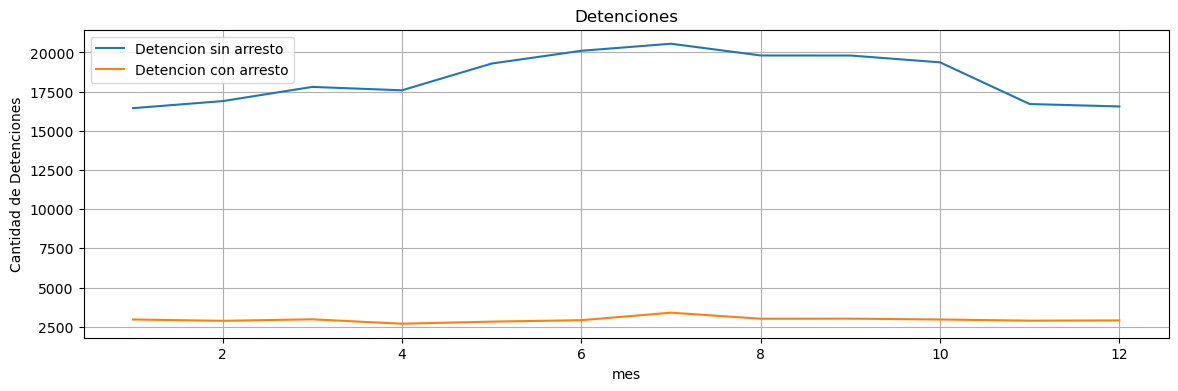

In [9]:
detencion_con_arresto = df_csv[df_csv['Arrest'] == True].groupby('mes').size()
detencion_sin_arresto = df_csv[df_csv['Arrest'] == False].groupby('mes').size()

#print(detencion_con_arresto)
#print(detencion_sin_arresto)

plt.figure(figsize=(14, 4))

plt.plot(detencion_sin_arresto, label="Detencion sin arresto")
plt.plot(detencion_con_arresto, label="Detencion con arresto")


# Títulos y etiquetas
plt.title("Detenciones")
plt.xlabel("mes")
plt.ylabel("Cantidad de Detenciones")
plt.legend()
plt.grid(True)

plt.show()


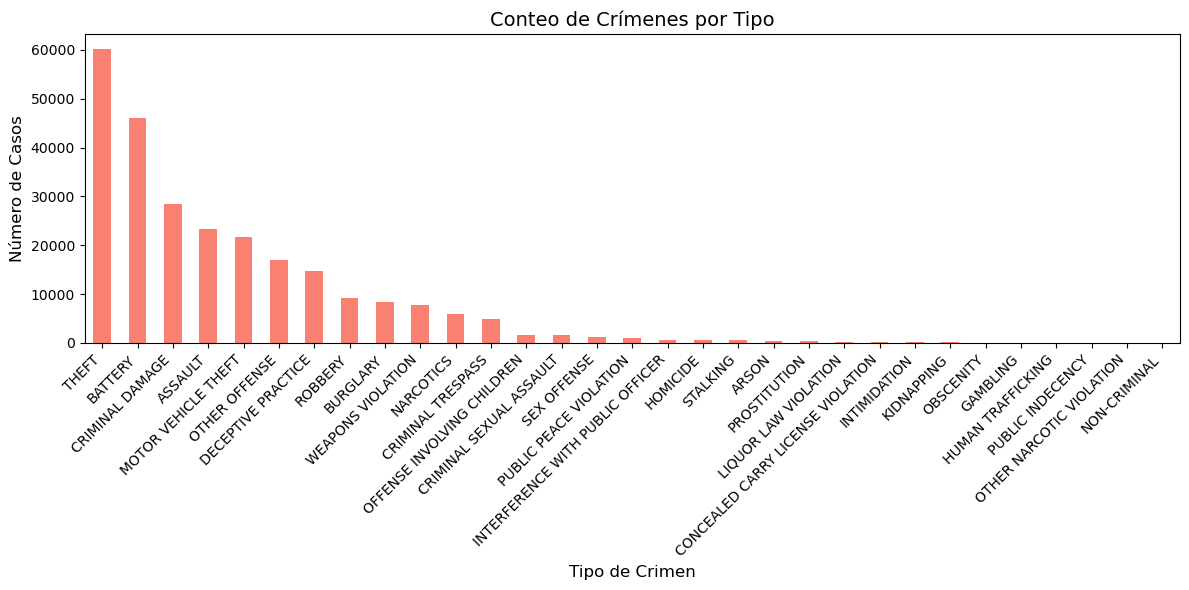

In [10]:
#Conteo de crímenes por tipo
# Paso 2: Contar los crímenes por tipo (columna 'Primary Type')
crimenes_por_tipo = df_csv['Primary Type'].value_counts().sort_values(ascending=False)

# Paso 3: Graficar en un gráfico de barras
plt.figure(figsize=(12, 6))
crimenes_por_tipo.plot(kind='bar', color='salmon')

# Etiquetas y título
plt.title('Conteo de Crímenes por Tipo', fontsize=14)
plt.xlabel('Tipo de Crimen', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Ajustes de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Ajuste del layout para que no se corte nada
plt.tight_layout()

# Mostrar el gráfico
plt.show()


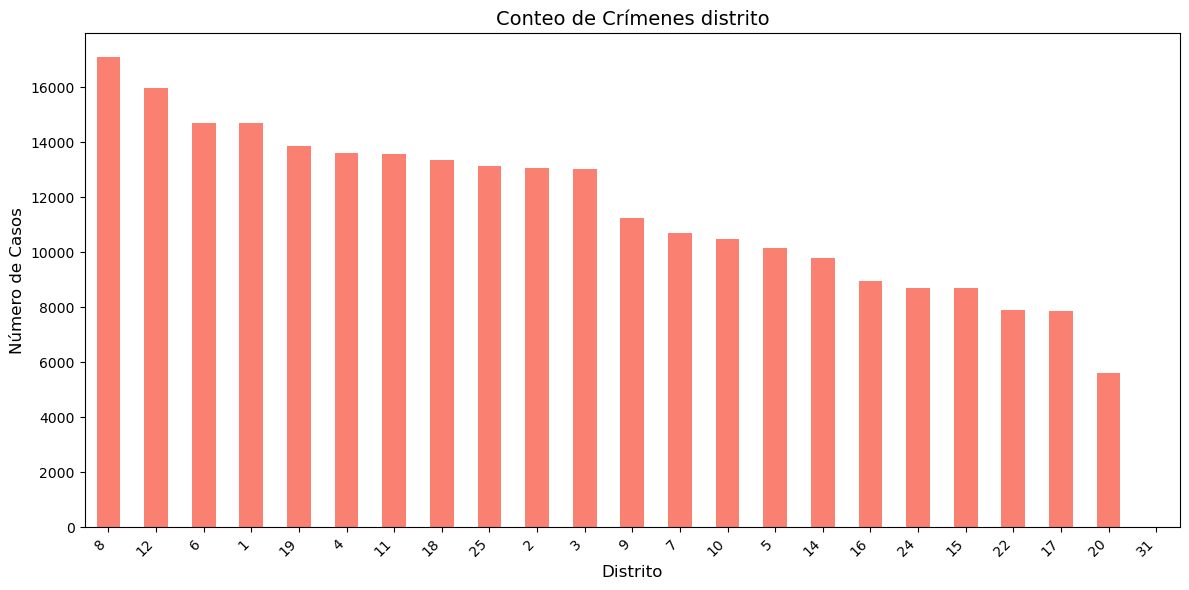

In [11]:
# crimenes por distrito
crimenes_por_distrito = df_csv['District'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
crimenes_por_distrito.plot(kind='bar', color='salmon')
plt.title('Conteo de Crímenes distrito', fontsize=14)
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Ajustes de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Ajuste del layout para que no se corte nada
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El distrito  policial 31 parece tener muy pocos crimenes, observamos la muestra

In [12]:
df_csv[df_csv["District"] == 31]

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,mes,dia_mes,dia_semana,hora
13558,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76,14,41.964381,-87.881131,12,9,0,22
13607,2027,NARCOTICS,POSSESS - CRACK,SIDEWALK,True,False,2422,31,49,1,18,42.019386,-87.673147,12,9,0,20
18780,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,False,1654,31,41,76,06,41.999621,-87.892058,12,2,0,1
33912,0560,ASSAULT,SIMPLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76,08A,41.964381,-87.881131,11,8,4,14
67937,0860,THEFT,RETAIL THEFT,GAS STATION,True,False,1654,31,41,76,06,41.999621,-87.892058,9,22,6,8
71272,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1653,31,41,76,14,41.964381,-87.881131,9,18,2,1
92857,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1654,31,41,76,06,41.999621,-87.892058,8,20,1,12
117889,0560,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,31,41,76,08A,41.964381,-87.881131,7,18,3,13
130262,1120,DECEPTIVE PRACTICE,FORGERY,BANK,False,False,1654,31,41,76,10,42.008962,-87.906473,7,2,1,11
186819,2820,OTHER OFFENSE,TELEPHONE THREAT,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31,41,76,08A,42.008962,-87.906473,4,17,2,10


Analizando el origen de los datos, entendemos que los 2 primeros dígitos de la columna Beat son el District ([fuente](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74))

Con esta información podemos suponer que los casos del District 31 esta mal cargados.  
Incluso podemos verificar si esto se extiende a otros casos.

In [13]:
df_csv[df_csv["District"] != (df_csv["Beat"].astype(int) // 100)]

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,mes,dia_mes,dia_semana,hora
13558,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76,14,41.964381,-87.881131,12,9,0,22
13607,2027,NARCOTICS,POSSESS - CRACK,SIDEWALK,True,False,2422,31,49,1,18,42.019386,-87.673147,12,9,0,20
18780,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,False,1654,31,41,76,06,41.999621,-87.892058,12,2,0,1
33912,0560,ASSAULT,SIMPLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76,08A,41.964381,-87.881131,11,8,4,14
67937,0860,THEFT,RETAIL THEFT,GAS STATION,True,False,1654,31,41,76,06,41.999621,-87.892058,9,22,6,8
71272,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1653,31,41,76,14,41.964381,-87.881131,9,18,2,1
92857,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1654,31,41,76,06,41.999621,-87.892058,8,20,1,12
117889,0560,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,31,41,76,08A,41.964381,-87.881131,7,18,3,13
130262,1120,DECEPTIVE PRACTICE,FORGERY,BANK,False,False,1654,31,41,76,10,42.008962,-87.906473,7,2,1,11
186819,2820,OTHER OFFENSE,TELEPHONE THREAT,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31,41,76,08A,42.008962,-87.906473,4,17,2,10


Vemos que solo los casos del District 31 tienen diferencias, podemos solucionarlo reemplazando por el District calculado a partir de Beat

In [14]:
df_csv.loc[df_csv["District"] == 31, "District"] = df_csv.loc[df_csv["District"] == 31, "Beat"].astype(int) // 100
df_csv["District"] = df_csv["District"].cat.remove_unused_categories()

#### Realizaremos un análisis de las columnas númericas en donde podríamos encontrar posibles Outliers aplicando métodos estadísticos

In [15]:
# Columnas numéricas relevantes
cols = ['Latitude', 'Longitude', "mes", "dia_mes", "dia_semana", "hora"]

# Detectar outliers usando IQR
def detectar_outliers(df_csv, columna):
    Q1 = df_csv[columna].quantile(0.25)
    Q3 = df_csv[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_csv[(df_csv[columna] < Q1 - 1.5 * IQR) | (df_csv[columna] > Q3 + 1.5 * IQR)]
    return outliers

# Aplicar a todas las columnas
for col in cols:
    outliers = detectar_outliers(df_csv, col)
    print(f"{col}: {len(outliers)} outliers")


Latitude: 0 outliers
Longitude: 1762 outliers
mes: 0 outliers
dia_mes: 0 outliers
dia_semana: 0 outliers
hora: 0 outliers


De las columnas seleccionadas para el análisis observamos que la columna Longitude es buena candidata.

Visualizamos con un Boxplot:

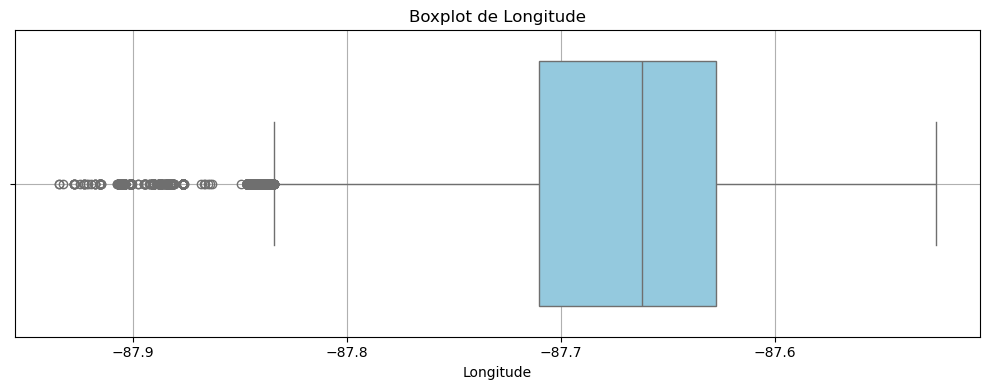

In [16]:
# Crear boxplot de la columna 'Longitude'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_csv['Longitude'].dropna(), color="skyblue")
plt.title('Boxplot de Longitude')
plt.xlabel('Longitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Como se puede observar en el gráfico, hay muchos valores a la izquierda del bigote (hacia -87.9 o más pequeños).  
Estos representan posibiles longitudes anómalas, eventualmente mal cargadas o bien corresponden a casos particulares que se analizan en el siguiente paso:

In [17]:
# Calcular Q1, Q3 y IQR
Q1 = df_csv['Longitude'].quantile(0.25)
Q3 = df_csv['Longitude'].quantile(0.75)
IQR = Q3 - Q1

# Limites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound:.5f}")
print(f"Límite superior: {upper_bound:.5f}")

# Filtrar registros que están fuera de los límites
outliers = df_csv[(df_csv['Longitude'] < lower_bound) | (df_csv['Longitude'] > upper_bound)]

# Mostrar los primeros 10 outliers
#print(outliers[['Primary Type','Block','Description','Location Description','Longitude','Latitude']].head(10))
display (outliers)

Límite inferior: -87.83382
Límite superior: -87.50346


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,mes,dia_mes,dia_semana,hora
161,4860,OTHER OFFENSE,BOARD PLANE WITH WEAPON,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,True,False,1651,16,41,76,26,41.979006,-87.906463,12,31,1,18
421,0890,THEFT,FROM BUILDING,APARTMENT,False,False,1614,16,41,76,06,41.975136,-87.842367,12,31,1,9
470,0460,BATTERY,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,16,41,76,08B,41.976763,-87.900984,12,31,1,5
586,0810,THEFT,OVER $500,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,False,False,1651,16,41,76,06,41.976290,-87.905227,12,31,1,0
800,0870,THEFT,POCKET-PICKING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,16,41,76,06,41.976182,-87.876421,12,30,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257732,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1614,16,41,76,08B,41.979254,-87.839673,1,1,0,11
257864,0810,THEFT,OVER $500,AIRCRAFT,False,False,1653,16,41,76,06,41.976763,-87.900984,1,1,0,7
257880,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,AIRPORT PARKING LOT,False,False,1651,16,41,76,07,41.976290,-87.905227,1,1,0,7
257969,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,False,1614,16,41,76,06,41.984622,-87.836582,1,1,0,3


La conclusión para estos casos, es que corresponden a crímenes cometidos en la zona del aeropuerto, por lo tanto no se pueden eliminar ya que está dentro de Chicago.  
Si observamos en el mapa, el aeropuerto se encuentra alejado de la ciudad, por eso los valores de Longitud caen como posibles outliers aunque en realidad no lo son.  
Esta diferenciación podría servir en caso de que se requiera analizar solo los crímenes en la zona del aeropuerto, o en zonas residenciales.

Analizamos la variable target

In [18]:
target = 'FBI Code'

# Primero separamos los features y el target
X = df_csv.drop(columns=[target])
y = df_csv[target]

Observemos gráficamente la distribución y desbalance en FBI CODE:

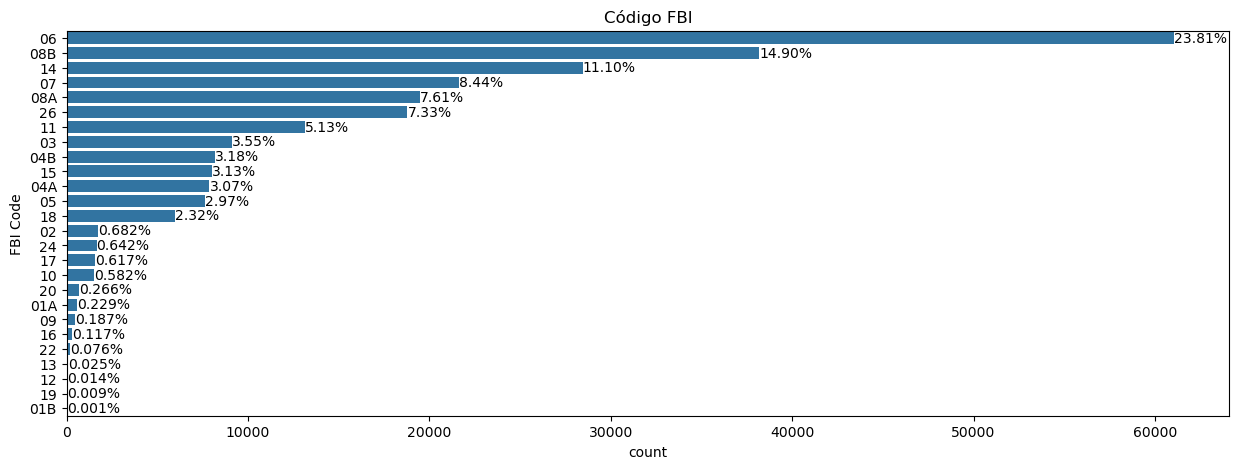

In [19]:
# Graficamos la distribución de FBI Code

fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=y, order=y.value_counts().index, ax=ax)
total = y.count()
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.2f}%' if (x/total) > 0.01 else f'{(x/total)*100:0.3f}%')
ax.set_title('Código FBI')
plt.show()

#### Para concluir si realmente el desbalance que observamos requiere un tratamiento, calculamos:
* Indice de Gini
* Entropía de Shannon


In [20]:
# Función auxiliar para mostrar info

def info_categorical(y):
    # Cantidad de categorías
    num_categ = y.nunique()
    print(f"Número de categorías únicas: {num_categ}")

    # Calculamos el porcentaje de cada categoría
    cantidad = y.value_counts()
    proportion = cantidad / cantidad.sum()
    proportion_sum = proportion.cumsum()
    print("Distribución de categorías:")
    with pd.option_context('display.max_columns', None):
        show_df = pd.DataFrame([proportion * 100, proportion_sum * 100, cantidad], index=["Porcentaje", "Acumulado", "Cantidad"])
        display(show_df.round(2))

    # Calculamos el índice de Gini
    gini_index = 1 - sum(proportion**2)
    gini_index_opt = 1 - len(proportion) * ((1/len(proportion))**2)
    print(f"Índice de Gini: {gini_index:.4f}")
    print(f"Índice de Gini óptimo: {gini_index_opt:.4f}")

    # Calculamos entropía de Shannon
    shannon_entropy = -sum(proportion * np.log2(proportion))
    shannon_entropy_max = np.log2(len(proportion))
    print(f"Entropía de Shannon: {shannon_entropy:.4f}")
    print(f"Entropía de Shannon máxima teórica: {shannon_entropy_max:.4f}")

    print(f"Muestras: {y.shape[0]}.")


In [21]:
info_categorical(y)

Número de categorías únicas: 26
Distribución de categorías:


FBI Code,06,08B,14,07,08A,26,11,03,04B,15,04A,05,18,02,24,17,10,20,01A,09,16,22,13,12,19,01B
Porcentaje,23.81,14.90,11.10,8.44,7.61,7.33,5.13,3.55,3.18,3.13,3.07,2.97,2.32,0.68,0.64,0.62,0.58,0.27,0.23,0.19,0.12,0.08,0.02,0.01,0.01,0.0
Acumulado,23.81,38.72,49.82,58.26,65.86,73.19,78.32,81.87,85.06,88.19,91.26,94.23,96.55,97.23,97.88,98.49,99.08,99.34,99.57,99.76,99.88,99.95,99.98,99.99,100.00,100.0
Cantidad,61037.00,38196.00,28447.00,21637.00,19493.00,18786.00,13149.00,9098.00,8162.00,8021.00,7875.00,7622.00,5949.00,1747.00,1646.00,1582.00,1491.00,682.00,586.00,480.00,301.00,196.00,64.00,35.00,22.00,2.0


Índice de Gini: 0.8820
Índice de Gini óptimo: 0.9615
Entropía de Shannon: 3.5206
Entropía de Shannon máxima teórica: 4.7004
Muestras: 256306.


Según los valores observados tanto para el Indice de Gini como para la Entropía de Shannon no es necesario realizar un balanceo, los valores son relativamente aceptables.

En un principio y antes del análisis detallado del desbalance, a nuestra observación considerábamos que si existía.  
Posterior a realizar el análisis matemático con el calculo de Gini y Shannon se pudo comprobar que el desbalance no es tan importante, por lo tanto no aplicamos ninguna técnica de mitigación.

<span style="color: red">Revisar: Nos queda la duda si es o no necesario realizar algún tratamiento para las clases con menor frecuencia.</span>

### Selección de features

#### Antes de continuar con la transformación, debemos separar en train y test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<Axes: >

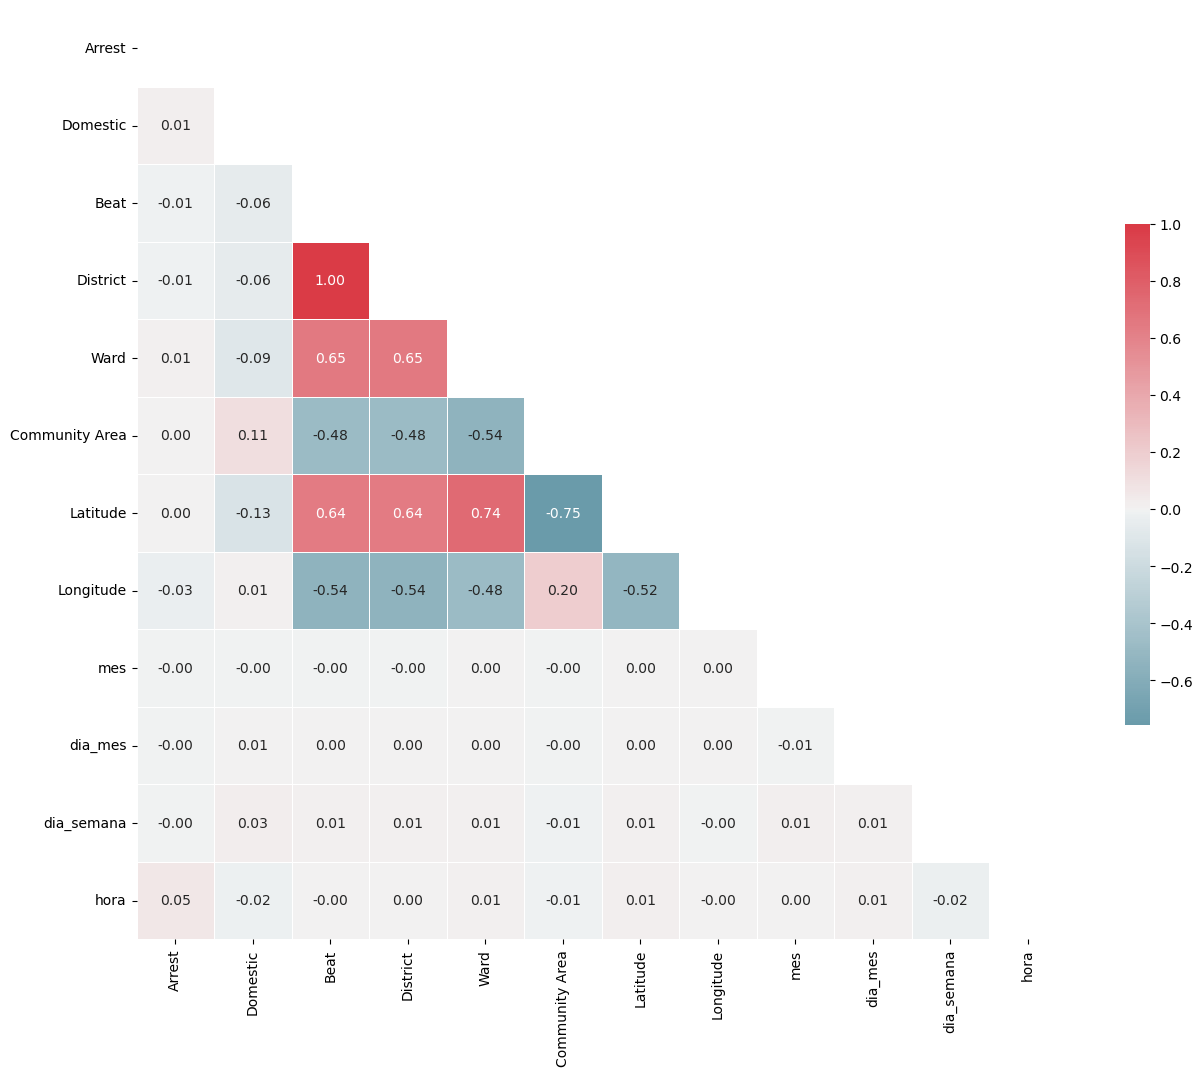

In [23]:
corr_cols = ['Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
 'Latitude', 'Longitude', 'mes', 'dia_mes', 'dia_semana', 'hora']
df_corr = df_csv[corr_cols]
corr = df_corr.corr(method = 'pearson') #.sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:12,0:12], mask=mask[0:12,0:12], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# 🛠 Armado y busqueda de modelo.

En esta sección, mostraremos cuáles fueron los pasos a seguir para el armado y búsqueda de modelos de predicción.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Seleccionamos las columnas que vamos utilizar (target)
cols_modelo = [
    'IUCR', 'Primary Type', 'Description', 'Location Description',
    'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
    'Latitude', 'Longitude', 'mes', 'dia_mes', 'dia_semana', 'hora'
]

# Armamos una copia del dataframe trabajado
df_model = df_csv[cols_modelo].copy()

# Separamos features y target
X = df_model.drop('FBI Code', axis=1)
y = df_model['FBI Code']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo de árbol de decisión



# 🧾 Resumen y conclusiones

En esta sección mencionamos los principales hallazgos del análisis realizado. Se destacan las relaciones más relevantes entre variables, los patrones identificados y las decisiones tomadas en el tratamiento de los datos. Además de próximos pasos que se podrían dar como trabajo futuro.


In [25]:
# ALGO